In [3]:
import img_scale
import astroalign as aa
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats

%matplotlib inline

# Importing

In [2]:
# total: 8 B filter, 7 V filter, 16, Ha filter

B = []
V = []
Ha = []

In [3]:
for i in range(8):
    file = '../reduced_images/target/B_reduced_' + str(i+1) + '.fits'
    B.append(pyfits.getdata(file, 0))

In [4]:
for i in range(7):
    file = '../reduced_images/target/V_reduced_' + str(i+1) + '.fits'
    V.append(pyfits.getdata(file, 0))

In [5]:
for i in range(16):
    file = '../reduced_images/target/Ha_reduced_' + str(i+1) + '.fits'
    Ha.append(pyfits.getdata(file, 0))

# Aligning & Cropping

In [6]:
def alignment(frame_1, frame_2):

    aligned = aa.register(frame_1, frame_2)
    
    return aligned

In [7]:
def cropper(image, right, bottom, left, top):
        
    trim_1 = np.arange(right, len(image), 1)
    trim_2 = np.arange(bottom, len(image), 1)
    trim_3 = np.arange(0, left, 1)
    trim_4 = np.arange(0, top, 1)

    trimmed_1 = np.delete(image, trim_1, 1)
    trimmed_2 = np.delete(trimmed_1, trim_2, 0)
    trimmed_3 = np.delete(trimmed_2, trim_3, 1)
    trimmed_4 = np.delete(trimmed_3, trim_4, 0)
    
    return trimmed_4

In [8]:
def master_image(image_list):      
    
    imagecube = np.array(image_list)
    master_image = np.median(imagecube, axis=0) * np.sqrt(len(image_list))
    
    return master_image

## B filter

In [9]:
aligned_B = []
aligned_B.append(B[0])

for i in range(len(B)-1):
    aligned_B.append(alignment(B[i+1], B[0]))

In [10]:
cropped_B = []

for img in aligned_B:
    cropped_B.append(cropper(aligned_B[i], 1275, 1250, 775, 750))

In [11]:
master_B = master_image(cropped_B)

/home/damien/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


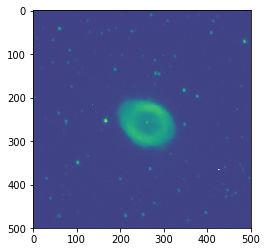

In [12]:
plt.imshow(np.log10(master_B))

## V filter

In [13]:
aligned_V = []
aligned_V.append(V[0])

for i in range(len(V)-1):
    aligned_V.append(alignment(V[i+1], V[0]))

In [14]:
cropped_V = []

for img in aligned_V:
    cropped_V.append(cropper(aligned_V[i], 1275, 1250, 775, 750))

In [15]:
master_V = master_image(cropped_V)

/home/damien/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


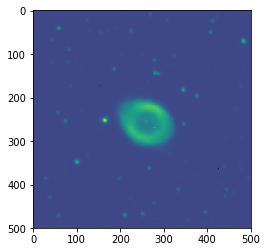

In [16]:
plt.imshow(np.log10(master_V))

## Ha filter

In [17]:
aligned_Ha = []
aligned_Ha.append(Ha[0])

for i in range(len(Ha)-1):
    aligned_Ha.append(alignment(Ha[i+1], Ha[0]))

In [18]:
cropped_Ha = []

for img in aligned_Ha:
    cropped_Ha.append(cropper(aligned_Ha[i], 1275, 1250, 775, 750))

In [19]:
master_Ha = master_image(cropped_Ha)

img_scale : asinh


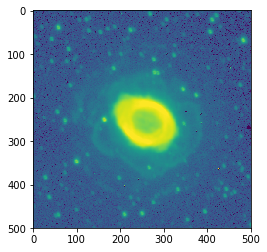

In [20]:
plt.imshow(img_scale.asinh(master_Ha,
           scale_min=np.percentile(np.unique(master_Ha),0.5),
           scale_max=np.percentile(np.unique(master_Ha),99.5)))

## Saving

In [21]:
h_B = pyfits.getheader('../calor_alto_data/NGC6720/dubU_0522.fits')
hdu_B = pyfits.PrimaryHDU(master_B, header=h_B)
hdu_B.writeto('../reduced_images/cropped/B.fits', overwrite=True)

h_V = pyfits.getheader('../calor_alto_data/NGC6720/dubU_0516.fits')
hdu_V = pyfits.PrimaryHDU(master_V, header=h_V)
hdu_V.writeto('../reduced_images/cropped/V.fits', overwrite=True)

h_Ha = pyfits.getheader('../calor_alto_data/NGC6720/dubU_0528.fits')
hdu_Ha = pyfits.PrimaryHDU(master_Ha, header=h_Ha)
hdu_Ha.writeto('../reduced_images/cropped/Ha.fits', overwrite=True)

# Quick False Colour

img_scale : sqrt
img_scale : sqrt
img_scale : sqrt


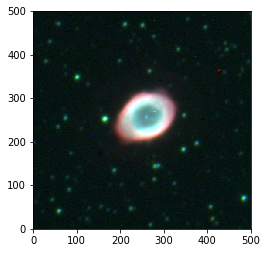

In [45]:
img_1 = img_scale.sqrt(master_Ha,
                         scale_min=np.percentile(np.unique(master_Ha),0.5),
#                          scale_max=img_Ha.max())
                         scale_max=np.percentile(np.unique(master_Ha),99.5))

img_2 = img_scale.sqrt(master_V,
                         scale_min=np.percentile(np.unique(master_V),0.5),
#                          scale_max=img_V.max())
                       scale_max=np.percentile(np.unique(master_V),99.5))

img_3 = img_scale.sqrt(master_B,
                         scale_min=np.percentile(np.unique(master_B),0.5),
#                          scale_max=img_B.max())
                        scale_max=np.percentile(np.unique(master_B),99.5))

NGC6720_quick_RGB=np.zeros((master_Ha.shape[0],
                            master_Ha.shape[1],
                            3),dtype=float)

NGC6720_quick_RGB[:,:,0] = img_1
NGC6720_quick_RGB[:,:,1] = img_2
NGC6720_quick_RGB[:,:,2] = img_3

# NGC6720_quick_aligned = alignment(
#     NGC6720_quick_RGB[:,:,0],
#     NGC6720_quick_RGB[:,:,1],
#     NGC6720_quick_RGB[:,:,2]
# )

plt.imshow(NGC6720_quick_RGB, origin='lower',interpolation='nearest')
# plt.imshow(NGC6720_quick_aligned, origin='lower',interpolation='nearest')
plt.savefig('../reduced_images/cropped/NGC6720_quick_RGB.png')

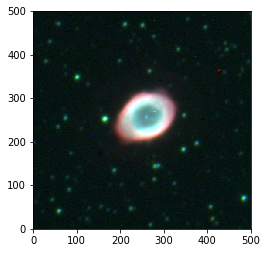

In [24]:
image = np.dstack([img_1, img_2, img_3])
plt.imshow(image, origin='lower', interpolation='nearest')

# Background Subtraction

In [37]:
import astropy.visualization as vs

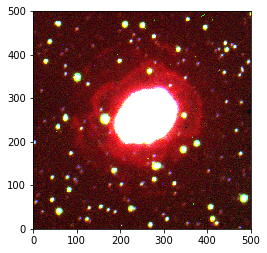

In [70]:
mean_Ha, median_Ha, std_Ha = sigma_clipped_stats(master_Ha, sigma_lower=0.5, maxiters=5)
mean_V, median_V, std_V = sigma_clipped_stats(master_V, sigma_lower=2.0, maxiters=5)
mean_B, median_B, std_B = sigma_clipped_stats(master_B, sigma_lower=2.0, maxiters=5)

norm = vs.ImageNormalize()
stretch = vs.AsinhStretch()
stretch2 = vs.SqrtStretch()
stretch3 = vs.LinearStretch()
stretch4 = vs.SquaredStretch()
stretch5 = vs.LogStretch()
interval = vs.ZScaleInterval()

img_4 = stretch(interval(master_Ha-mean_Ha))

img_5 = stretch4(interval(master_V-mean_V))

img_6 = stretch4(interval(master_B-mean_B))

plt.imshow(np.dstack([img_4, img_5, img_6]), origin='lower', interpolation='nearest')
# plt.savefig('../reduced_images/cropped/NGC6720_bgSub_RGB.png')

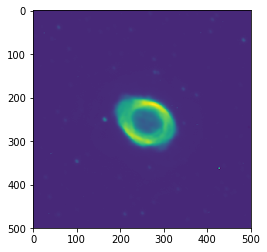

In [118]:
plt.imshow(stretch(norm(cropped_Ha), 1))#-mean_Ha)

In [ ]:
rgb_img = vs.make_lupton_rgb(img_1, img_2, img_3)

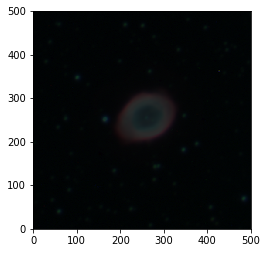

In [123]:
plt.imshow(rgb_img, origin='lower', interpolation='nearest')

## Greyscale Colourisation

In [53]:
from skimage import color
from skimage.exposure import rescale_intensity, equalize_adapthist, adjust_gamma,adjust_log,adjust_sigmoid

In [51]:
def colorize(image, hue, saturation=1,v=1):
    ### Add color of the given hue to an RGB greyscale image.
    hsv = color.rgb2hsv(image)
    hsv[:, :, 2] *= v
    hsv[:, :, 1] = saturation
    hsv[:, :, 0] = hue
    return color.hsv2rgb(hsv)

img_scale : log
img_scale : log
img_scale : log
img_scale : sqrt
img_scale : linear
img_scale : linear
img_scale : linear


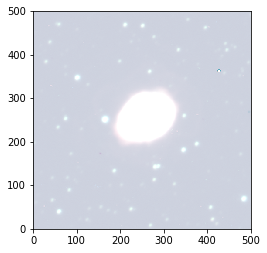

In [59]:
# mport pywcsgrid2 

# m51_hdr=pyfits.getheader('m51_optical_R.fits')

#Scale image between -1 and 1 if data type is float...
img_Ha_scaled = img_scale.log(cropped_Ha)
img_V_scaled = img_scale.log(cropped_V)
img_B_scaled = img_scale.log(cropped_B)

#Convert to RGB grayscale
img_Ha_grey = color.gray2rgb(img_Ha_scaled)
img_V_grey = color.gray2rgb(img_V_scaled)
img_B_grey = color.gray2rgb(img_B_scaled)

#Colorize the grayscale images
img_Ha_R = colorize(img_Ha_grey, hue=1./360,saturation=0.88,v=.75)
img_V_G = colorize(img_V_grey, hue=59./360,saturation=0.55,v=0.9)
img_B_B = colorize(img_B_grey, hue=218./360,saturation=0.6,v=.57)

#Combine the colorized frames and do final rescaling
NGC6720_RYB = img_scale.sqrt(np.nansum([img_Ha_R,
                                          img_V_G,
                                          img_B_B]
                                         ,axis=0))

RYB_maxints=tuple(np.nanmax(NGC6720_RYB[:,:,i]) for i in [0,1,2])

for i in [0,1,2]: 
    NGC6720_RYB[:,:,i] = rescale_intensity(NGC6720_RYB[:,:,i],
                                           out_range=(0,
                                                      NGC6720_RYB[:,:,i].max()/np.max(RYB_maxints)
                                                     )
                                          )
for i in [0,1,2]: 
    NGC6720_RYB[:,:,i] = img_scale.linear(NGC6720_RYB[:,:,i],
                                          scale_min=np.percentile(NGC6720_RYB[:,:,i], 0.),
                                          scale_max=np.percentile(np.unique(NGC6720_RYB[:,:,i]),95.)
                                         )

# alignment
# NGC6720_aligned = alignment(
#     NGC6720_RYB[:,:,0],
#     NGC6720_RYB[:,:,1],
#     NGC6720_RYB[:,:,2]
# )
    
#Plot
plt.imshow(NGC6720_RYB, origin='lower', interpolation='nearest')
# plt.imshow(NGC6720_aligned, origin='lower', interpolation='nearest')
# plt.savefig('M51_RYBL.png',bbox_inches='tight')

In [10]:
from astropy.wcs import WCS

In [35]:
# Load the FITS hdulist using astropy.io.fits
hdulist = pyfits.open('../reduced_images/cropped/Ha.fits')

# Parse the WCS keywords in the primary HDU
w = wcs.WCS('../reduced_images/cropped/Ha.fits')

# Print out the "name" of the WCS, as defined in the FITS header
print(w.wcs.name)

# Print out all of the settings that were parsed from the header
w.wcs.print_contents()

In [64]:
w

WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS : 2048  2056

In [1]:
import astropy
astropy.test()

/home/damien/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


==================================== test session starts ====================================
platform linux -- Python 3.6.7, pytest-4.4.0, py-1.8.0, pluggy-0.9.0

Running tests with Astropy version 3.1.2.
Running tests in /home/damien/.local/lib/python3.6/site-packages/astropy.

Date: 2019-04-11T19:38:44

Platform: Linux-4.18.0-17-generic-x86_64-with-Ubuntu-18.04-bionic

Executable: /usr/bin/python3

Full Python Version: 
3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]

encodings: sys: utf-8, locale: UTF-8, filesystem: utf-8
byteorder: little
float info: dig: 15, mant_dig: 15

Numpy: 1.16.2
Scipy: 1.2.1
Matplotlib: 3.0.3
h5py: not available
Pandas: not available
Cython: 0.29.6
Scikit-image: 0.15.0
astropy_helpers: 3.1.1
Using Astropy options: remote_data: none.

rootdir: /home/damien/.local/lib/python3.6/site-packages/astropy
plugins: remotedata-0.3.1, openfiles-0.3.2, doctestplus-0.3.0, arraydiff-0.3
collected 11917 items / 9 skipped / 11908 selected

../../../../../../../../../.

.ssssss.ssss...s.......s                                                              [ 23%]
../../../../../../../../../../home/damien/.local/lib/python3.6/site-packages/astropy/io/ascii/tests/test_ipac_definitions.py . [ 23%]
...................                                                                   [ 23%]
../../../../../../../../../../home/damien/.local/lib/python3.6/site-packages/astropy/io/ascii/tests/test_read.py . [ 23%]
..................................................................................... [ 24%]
..........................s................                                           [ 25%]
../../../../../../../../../../home/damien/.local/lib/python3.6/site-packages/astropy/io/ascii/tests/test_rst.py . [ 25%]
........                                                                              [ 25%]
../../../../../../../../../../home/damien/.local/lib/python3.6/site-packages/astropy/io/ascii/tests/test_types.py . [ 25%]
..                                 

......................................                                                [ 47%]
../../../../../../../../../../home/damien/.local/lib/python3.6/site-packages/astropy/nddata/tests/test_nddata_base.py . [ 47%]
                                                                                      [ 47%]
../../../../../../../../../../home/damien/.local/lib/python3.6/site-packages/astropy/nddata/tests/test_nduncertainty.py . [ 47%]
..........................................................................            [ 48%]
../../../../../../../../../../home/damien/.local/lib/python3.6/site-packages/astropy/nddata/tests/test_utils.py . [ 48%]
........................................................                              [ 48%]
../../../../../../../../../../home/damien/.local/lib/python3.6/site-packages/astropy/samp/tests/test_client.py . [ 48%]
...                                                                                   [ 48%]
../../../../../../../../../../home/dam

Exception: This is an Exception

Exception: This is an Exception

x

TypeError: homogeneous list must contain only objects of type '<class 'int'>'

xs................                                                          [ 73%]
../../../../../../../../../../home/damien/.local/lib/python3.6/site-packages/astropy/tests/tests/test_imports.py . [ 73%]
.                                                                                     [ 73%]
../../../../../../../../../../home/damien/.local/lib/python3.6/site-packages/astropy/tests/tests/test_quantity_helpers.py . [ 73%]
                                                                                      [ 73%]
../../../../../../../../../../home/damien/.local/lib/python3.6/site-packages/astropy/tests/tests/test_run_tests.py . [ 73%]
...                                                                                   [ 73%]
../../../../../../../../../../home/damien/.local/lib/python3.6/site-packages/astropy/tests/tests/test_runner.py . [ 73%]
.....                                                                                 [ 73%]
../../../../../../../../../../home/damien/.loca

../../../../../../../../../../home/damien/.local/lib/python3.6/site-packages/astropy/wcs/tests/test_utils.py . [ 98%]
..............................................                                        [ 98%]
../../../../../../../../../../home/damien/.local/lib/python3.6/site-packages/astropy/wcs/tests/test_wcs.py . [ 98%]
..........................................................                            [ 98%]
../../../../../../../../../../home/damien/.local/lib/python3.6/site-packages/astropy/wcs/tests/test_wcsprm.py . [ 98%]
..................................................................................... [ 99%]
..............x..........                                                             [ 99%]
../../../../../../../../../../home/damien/.local/lib/python3.6/site-packages/astropy/wcs/tests/extension/test_extension.py . [ 99%]
                                                                                      [ 99%]
../../../../../../../../../../home/damien/.local/l

    "zero-if-kernel-leaves-boundary", AstropyUserWarning)

io/ascii/tests/test_c_reader.py::test_data_out_of_range[False-fast_reader1-True]
io/ascii/tests/test_c_reader.py::test_data_out_of_range[False-fast_reader1-False]
io/ascii/tests/test_c_reader.py::test_data_out_of_range[False-fast_reader2-True]
io/ascii/tests/test_c_reader.py::test_data_out_of_range[False-fast_reader2-False]
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/ascii/fastbasic.py:128: AstropyWarning: OverflowError converting to FloatType in column col2, possibly resulting in degraded precision.
    data, comments = self.engine.read(try_int, try_float, try_string)

io/ascii/tests/test_c_reader.py::test_data_out_of_range[False-fast_reader1-True]
io/ascii/tests/test_c_reader.py::test_data_out_of_range[False-fast_reader1-False]
io/ascii/tests/test_c_reader.py::test_data_out_of_range[False-fast_reader2-True]
io/ascii/tests/test_c_reader.py::test_data_out_of_range[False-fast_reader2-False]
  /home/damien/.local

    .format(converter_type.__name__, col.name), AstropyWarning)

io/ascii/tests/test_read.py::test_from_filelike[True]
io/ascii/tests/test_read.py::test_from_filelike[False]
io/ascii/tests/test_read.py::test_from_filelike[force]
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/ascii/tests/test_read.py:403: ResourceWarning: unclosed file <_io.TextIOWrapper name='t/simple.txt' encoding='UTF-8'>
    data = ascii.read(fd, fast_reader=fast_reader, **testfile['opts'])

io/ascii/tests/test_read.py::test_guessing_file_object
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/ascii/tests/test_read.py:989: ResourceWarning: unclosed file <_io.BufferedReader name='t/ipac.dat.bz2'>
    t = ascii.read(open('t/ipac.dat.bz2', 'rb'))

io/ascii/tests/test_read.py::test_read_chunks_input_types
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/ascii/tests/test_read.py:1352: ResourceWarning: unclosed file <_io.TextIOWrapper name='t/test5.dat' mode='r' encoding='UTF-8'>
    

    print_headers_as_comparison(args)

io/fits/tests/test_fitsheader.py::TestFITSheader_script::test_fitsort
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/fits/scripts/fitsheader.py:318: ResourceWarning: unclosed file <_io.FileIO name='/home/damien/.local/lib/python3.6/site-packages/astropy/io/fits/tests/data/tdim.fits' mode='rb' closefd=True>
    formatter = TableHeaderFormatter(filename, verbose=False)

io/fits/tests/test_fitsheader.py::TestFITSheader_script::test_fitsort
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/fits/scripts/fitsheader.py:318: ResourceWarning: unclosed file <_io.FileIO name='/home/damien/.local/lib/python3.6/site-packages/astropy/io/fits/tests/data/table.fits' mode='rb' closefd=True>
    formatter = TableHeaderFormatter(filename, verbose=False)

io/fits/tests/test_fitsheader.py::TestFITSheader_script::test_fitsort
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/fits/scripts/fitsheader.py:428: ResourceWarning: unclosed f

io/tests/test_registry.py::test_write_noformat_arbitrary
io/tests/test_registry.py::test_read_format_noreader
io/tests/test_registry.py::test_write_format_nowriter
io/tests/test_registry.py::test_read_identifier
io/tests/test_registry.py::test_write_identifier
  /home/damien/.local/lib/python3.6/site-packages/astropy/table/column.py:965: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
    return getattr(self.data, op)(other)

io/votable/tests/converter_test.py::test_char_mask
io/votable/tests/tree_test.py::test_check_astroyear_fail
io/votable/tests/vo_test.py::test_build_from_scratch
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/converters.py:302: W47: ?:?:?: W47: Missing arraysize indicates length 1
    vo_warn(W47, (), config, pos)

io/votable/tests/converter_test.py::test_unicode_mask
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/converters.py:381: W47: ?:?:?: 

io/votable/tests/vo_test.py::test_select_columns_by_name
io/votable/tests/vo_test.py::TestParse::test_string_test
io/votable/tests/vo_test.py::TestThroughTableData::test_string_test
io/votable/tests/vo_test.py::TestThroughBinary::test_string_test
io/votable/tests/vo_test.py::TestThroughBinary2::test_string_test
io/votable/tests/vo_test.py::test_open_files
io/votable/tests/vo_test.py::test_gzip_filehandles
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/converters.py:457: W01: /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/tests/data/regression.xml:20:0: W01: Array uses commas rather than whitespace
    vo_warn(W01, (), config, pos)

io/votable/tests/table_test.py::test_table
io/votable/tests/vo_test.py::test_parse_single_table
io/votable/tests/vo_test.py::test_parse_single_table2
io/votable/tests/vo_test.py::test_parse_single_table3
io/votable/tests/vo_test.py::test_regression
io/votable/tests/vo_test.py::test_regression_python_based_parser
io/v

  /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/converters.py:457: W01: /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/tests/data/regression.xml:99:2: W01: Array uses commas rather than whitespace
    vo_warn(W01, (), config, pos)

io/votable/tests/table_test.py::test_table
io/votable/tests/vo_test.py::test_parse_single_table
io/votable/tests/vo_test.py::test_parse_single_table2
io/votable/tests/vo_test.py::test_parse_single_table3
io/votable/tests/vo_test.py::test_regression
io/votable/tests/vo_test.py::test_regression_python_based_parser
io/votable/tests/vo_test.py::test_regression_binary2
io/votable/tests/vo_test.py::TestFixups::test_implicit_id
io/votable/tests/vo_test.py::TestReferences::test_fieldref
io/votable/tests/vo_test.py::test_select_columns_by_index
io/votable/tests/vo_test.py::test_select_columns_by_name
io/votable/tests/vo_test.py::TestParse::test_string_test
io/votable/tests/vo_test.py::TestThroughTableData::test_string_test
io/

    vo_warn(W46, ('char', self.arraysize), config, pos)

io/votable/tests/table_test.py::test_table
io/votable/tests/vo_test.py::test_parse_single_table
io/votable/tests/vo_test.py::test_regression
io/votable/tests/vo_test.py::test_regression_binary2
io/votable/tests/vo_test.py::TestFixups::test_implicit_id
io/votable/tests/vo_test.py::TestReferences::test_fieldref
io/votable/tests/vo_test.py::test_select_columns_by_index
io/votable/tests/vo_test.py::test_select_columns_by_name
io/votable/tests/vo_test.py::TestParse::test_string_test
io/votable/tests/vo_test.py::TestThroughTableData::test_string_test
io/votable/tests/vo_test.py::TestThroughBinary::test_string_test
io/votable/tests/vo_test.py::TestThroughBinary2::test_string_test
io/votable/tests/vo_test.py::test_open_files
io/votable/tests/vo_test.py::test_gzip_filehandles
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/converters.py:825: W51: /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/tests

io/votable/tests/vo_test.py::test_regression_binary2
io/votable/tests/vo_test.py::TestFixups::test_implicit_id
io/votable/tests/vo_test.py::TestReferences::test_fieldref
io/votable/tests/vo_test.py::TestParse::test_string_test
io/votable/tests/vo_test.py::TestThroughTableData::test_string_test
io/votable/tests/vo_test.py::TestThroughBinary::test_string_test
io/votable/tests/vo_test.py::TestThroughBinary2::test_string_test
io/votable/tests/vo_test.py::test_open_files
io/votable/tests/vo_test.py::test_gzip_filehandles
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/converters.py:825: W51: /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/tests/data/regression.xml:232:6: W51: Value '65536' is out of range for a 16-bit integer field
    warn_or_raise(W51, W51, (value, self.bit_size), config, pos)

io/votable/tests/table_test.py::test_table
io/votable/tests/vo_test.py::test_parse_single_table
io/votable/tests/vo_test.py::test_regression
io/votable/tests

io/votable/tests/table_test.py::test_read_through_table_interface
io/votable/tests/table_test.py::test_read_through_table_interface2
table/tests/test_showtable.py::test_votable
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/converters.py:580: E02: None:129:2: E02: Incorrect number of elements in array. Expected multiple of 4, got 1
    warn_or_raise(E02, E02, (self._items, len(parts)), config, pos)

io/votable/tests/table_test.py::test_read_through_table_interface
io/votable/tests/table_test.py::test_read_through_table_interface2
table/tests/test_showtable.py::test_votable
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/converters.py:800: W49: None:129:2: W49: Empty cell illegal for integer fields.
    warn_or_raise(W49, W49, (), config, pos)

io/votable/tests/table_test.py::test_read_through_table_interface
io/votable/tests/table_test.py::test_read_through_table_interface2
table/tests/test_showtable.py::test_votable
  /home/damien/.local/lib/

    vo_warn(W46, ('char', self.arraysize), config, pos)

io/votable/tests/vo_test.py::test_regression_python_based_parser
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/converters.py:401: W46: /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/tests/data/regression.xml:109:28: W46: unicodeChar value is too long for specified length of 10
    vo_warn(W46, ('unicodeChar', self.arraysize), config, pos)

io/votable/tests/vo_test.py::test_regression_python_based_parser
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/converters.py:337: W46: /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/tests/data/regression.xml:110:11: W46: char value is too long for specified length of 4
    vo_warn(W46, ('char', self.arraysize), config, pos)

io/votable/tests/vo_test.py::test_regression_python_based_parser
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/converters.py:580: E02: /home/damien/.local/lib/python

    warn_or_raise(W51, W51, (value, self.bit_size), config, pos)

io/votable/tests/vo_test.py::test_regression_python_based_parser
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/converters.py:825: W51: /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/tests/data/regression.xml:232:13: W51: Value '65536' is out of range for a 16-bit integer field
    warn_or_raise(W51, W51, (value, self.bit_size), config, pos)

io/votable/tests/vo_test.py::test_regression_python_based_parser
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/converters.py:457: W01: /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/tests/data/regression.xml:237:12: W01: Array uses commas rather than whitespace
    vo_warn(W01, (), config, pos)

io/votable/tests/vo_test.py::test_regression_python_based_parser
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/converters.py:580: E02: /home/damien/.local/lib/python3.6/site-packages/a

    vo_warn(W30, value, config, pos)

io/votable/tests/vo_test.py::test_open_files
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/converters.py:723: W30: /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/tests/data/irsa-nph-m31.xml:49:349: W30: Invalid literal for float '-'.  Treating as empty.
    vo_warn(W30, value, config, pos)

io/votable/tests/vo_test.py::test_open_files
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/converters.py:723: W30: /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/tests/data/irsa-nph-m31.xml:51:209: W30: Invalid literal for float 'null'.  Treating as empty.
    vo_warn(W30, value, config, pos)

io/votable/tests/vo_test.py::test_open_files
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/converters.py:723: W30: /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/tests/data/irsa-nph-m31.xml:51:338: W30: Invalid literal for float '-'.  Treating as

    config, pos)

io/votable/tests/vo_test.py::test_too_many_columns
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/tree.py:274: W06: /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/tests/data/too_many_columns.xml.gz:42:0: W06: Invalid UCD 'inst.det': Unknown word 'inst.det'
    vo_warn(W06, (ucd, str(e)), config, pos)

io/votable/tests/vo_test.py::test_too_many_columns
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/converters.py:302: W47: /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/tests/data/too_many_columns.xml.gz:42:0: W47: Missing arraysize indicates length 1
    vo_warn(W47, (), config, pos)

io/votable/tests/vo_test.py::test_too_many_columns
  /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/tree.py:1215: W13: /home/damien/.local/lib/python3.6/site-packages/astropy/io/votable/tests/data/too_many_columns.xml.gz:45:0: W13: 'string' is not a valid VOTable datatype, should be 'cha

modeling/tests/test_models_quantities.py::test_models_fitting[model25]
modeling/tests/test_models_quantities.py::test_models_fitting[model26]
  /home/damien/.local/lib/python3.6/site-packages/astropy/modeling/fitting.py:896: AstropyUserWarning: The fit may be unsuccessful; check fit_info['message'] for more information.
    AstropyUserWarning)

modeling/tests/test_constraints.py::TestLinearConstraints::test
modeling/tests/test_fitters.py::TestLinearLSQFitter::test_linear_fit_2d_model_set
modeling/tests/test_fitters.py::TestLinearLSQFitter::test_linear_fit_fixed_parameter
modeling/tests/test_fitters.py::TestLinearLSQFitter::test_linear_fit_model_set_fixed_parameter
modeling/tests/test_fitters.py::TestLinearLSQFitter::test_linear_fit_2d_model_set_fixed_parameters
modeling/tests/test_polynomial.py::TestFitting::test_linear_fitter_1D[Chebyshev1D-True]
modeling/tests/test_polynomial.py::TestFitting::test_linear_fitter_1D[Hermite1D-True]
modeling/tests/test_polynomial.py::TestFitting::test_l

    exponent = -alpha - beta * np.log(xx)

modeling/tests/test_models.py::TestFittable1DModels::test_deriv_1D[LogParabola1D-test_parameters14]
modeling/tests/test_models_quantities.py::test_models_fitting[model26]
  /home/damien/.local/lib/python3.6/site-packages/astropy/modeling/powerlaws.py:493: RuntimeWarning: overflow encountered in power
    return amplitude * xx ** exponent

modeling/tests/test_models.py::TestFittable1DModels::test_deriv_1D[PowerLaw1D-test_parameters15]
modeling/tests/test_models_quantities.py::test_models_fitting[model22]
  /home/damien/.local/lib/python3.6/site-packages/astropy/modeling/powerlaws.py:53: RuntimeWarning: invalid value encountered in power
    return amplitude * xx ** (-alpha)

modeling/tests/test_models.py::TestFittable1DModels::test_deriv_1D[SmoothlyBrokenPowerLaw1D-test_parameters16]
  /home/damien/.local/lib/python3.6/site-packages/astropy/modeling/powerlaws.py:297: RuntimeWarning: overflow encountered in power
    / (2. ** ((alpha_1 - alpha_2

nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_stddevuncertainty_with_units[uncert19-uncert29]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_stddevuncertainty_with_units[uncert19-uncert29]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_stddevuncertainty_with_units[uncert19-uncert29]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_stddevuncertainty_with_units[uncert19-uncert29]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_stddevuncertainty_with_units[uncert19-uncert29]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_stddevuncertainty_with_units[uncert110-uncert210]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_stddevuncertainty_with_units[uncert110-uncert210]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_stddevuncertainty_with_units[uncert110-uncert210]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_stddevuncertainty_with_units[uncert110-uncert210]
nddata/mixins/tests/test_ndar

nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_varianceuncertainty_with_units[uncert19-uncert29]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_varianceuncertainty_with_units[uncert19-uncert29]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_varianceuncertainty_with_units[uncert19-uncert29]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_varianceuncertainty_with_units[uncert19-uncert29]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_varianceuncertainty_with_units[uncert19-uncert29]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_varianceuncertainty_with_units[uncert19-uncert29]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_varianceuncertainty_with_units[uncert19-uncert29]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_varianceuncertainty_with_units[uncert19-uncert29]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_varianceuncertainty_with_units[uncert19-uncert29]
nddata/mixins/tests

nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_inversevarianceuncertainty_with_units[uncert16-uncert26]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_inversevarianceuncertainty_with_units[uncert16-uncert26]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_inversevarianceuncertainty_with_units[uncert16-uncert26]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_inversevarianceuncertainty_with_units[uncert16-uncert26]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_inversevarianceuncertainty_with_units[uncert16-uncert26]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_inversevarianceuncertainty_with_units[uncert16-uncert26]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_inversevarianceuncertainty_with_units[uncert16-uncert26]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_inversevarianceuncertainty_with_units[uncert16-uncert26]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_inversevarian

nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_inversevarianceuncertainty_with_units[uncert111-uncert211]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_inversevarianceuncertainty_with_units[uncert111-uncert211]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_inversevarianceuncertainty_with_units[uncert111-uncert211]
nddata/tests/test_ccddata.py::test_mult_div_overload[True-2.0-multiply-True]
nddata/tests/test_ccddata.py::test_mult_div_overload[True-2.0-divide-True]
nddata/tests/test_ccddata.py::test_mult_div_overload[True-operand1-multiply-True]
nddata/tests/test_ccddata.py::test_mult_div_overload[True-operand1-divide-True]
nddata/tests/test_ccddata.py::test_mult_div_overload[True-operand2-multiply-True]
nddata/tests/test_ccddata.py::test_mult_div_overload[True-operand2-divide-True]
nddata/tests/test_ccddata.py::test_arithmetic_overload_ccddata_operand
nddata/tests/test_ccddata.py::test_arithmetic_overload_ccddata_operand
nddata/tests/test_ccddata.py

    return 1 / x

nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_inversevarianceuncertainty_basic_with_correlation[-1-uncert10-data20]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_inversevarianceuncertainty_basic_with_correlation[-1-uncert17-data27]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_inversevarianceuncertainty_basic_with_correlation[1-uncert120-data220]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_inversevarianceuncertainty_basic_with_correlation[1-uncert127-data227]
  /home/damien/.local/lib/python3.6/site-packages/astropy/nddata/mixins/tests/test_ndarithmetic.py:600: RuntimeWarning: divide by zero encountered in true_divide
    (2 * cor / np.sqrt(uncert1 * uncert2) / (data1 * data2))))

nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_inversevarianceuncertainty_basic_with_correlation[1-uncert16-data26]
nddata/mixins/tests/test_ndarithmetic.py::test_arithmetics_inversevarianceuncertainty_basic_with_correlation[1

stats/lombscargle/tests/test_statistics.py::test_inverses[10-False-model-baluev]
stats/lombscargle/tests/test_statistics.py::test_inverses[10-False-model-davies]
stats/lombscargle/tests/test_statistics.py::test_inverses[10-False-model-naive]
stats/lombscargle/tests/test_statistics.py::test_inverses[100-True-standard-baluev]
stats/lombscargle/tests/test_statistics.py::test_inverses[100-True-standard-davies]
stats/lombscargle/tests/test_statistics.py::test_inverses[100-True-standard-naive]
stats/lombscargle/tests/test_statistics.py::test_inverses[100-True-psd-baluev]
stats/lombscargle/tests/test_statistics.py::test_inverses[100-True-psd-davies]
stats/lombscargle/tests/test_statistics.py::test_inverses[100-True-psd-naive]
stats/lombscargle/tests/test_statistics.py::test_inverses[100-True-log-baluev]
stats/lombscargle/tests/test_statistics.py::test_inverses[100-True-log-davies]
stats/lombscargle/tests/test_statistics.py::test_inverses[100-True-log-naive]
stats/lombscargle/tests/test_statis

    AstropyUserWarning)

stats/tests/test_sigma_clipping.py::test_invalid_sigma_clip
stats/tests/test_sigma_clipping.py::test_invalid_sigma_clip
stats/tests/test_sigma_clipping.py::test_invalid_sigma_clip
  /home/damien/.local/lib/python3.6/site-packages/astropy/stats/sigma_clipping.py:344: AstropyUserWarning: Input data contains invalid values (NaNs or infs), which were automatically clipped.
    AstropyUserWarning)

table/tests/test_index.py::TestIndex::test_table_index[unmasked-main_col2-BST-False]
table/tests/test_index.py::TestIndex::test_table_index[unmasked-main_col2-BST-True]
table/tests/test_index.py::TestIndex::test_table_index[unmasked-main_col2-SortedArray-False]
table/tests/test_index.py::TestIndex::test_table_index[unmasked-main_col2-SortedArray-True]
table/tests/test_index.py::TestIndex::test_table_index[masked-main_col2-BST-False]
table/tests/test_index.py::TestIndex::test_table_index[masked-main_col2-BST-True]
table/tests/test_index.py::TestIndex::test_table_index[mask

time/tests/test_delta.py::TestTimeDelta::test_sub_vector
  /home/damien/.local/lib/python3.6/site-packages/astropy/_erfa/core.py:107: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
    warnings.warn('ERFA function "' + func_name + '" yielded ' + wmsg, ErfaWarning)

time/tests/test_delta.py::TestTimeDelta::test_add_vector
time/tests/test_delta.py::TestTimeDelta::test_sub_vector
  /home/damien/.local/lib/python3.6/site-packages/astropy/_erfa/core.py:107: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
    warnings.warn('ERFA function "' + func_name + '" yielded ' + wmsg, ErfaWarning)

time/tests/test_delta.py::TestTimeDelta::test_add_vector
time/tests/test_delta.py::TestTimeDelta::test_sub_vector
  /home/damien/.local/lib/python3.6/site-packages/astropy/_erfa/core.py:107: ErfaWarning: ERFA function "taiutc" yielded 2 of "dubious year (Note 4)"
    warnings.warn('ERFA function "' + func_name + '" yielded ' + wmsg, ErfaWarning)

time/tests

    warnings.warn(message, UnitsWarning)

units/tests/test_format.py::test_roundtrip_vo_unit[unit24]
  /home/damien/.local/lib/python3.6/site-packages/astropy/units/format/utils.py:218: UnitsWarning: The unit 'barn' has been deprecated in the VOUnit standard. Suggested: 1 10-28m2.
    warnings.warn(message, UnitsWarning)

units/tests/test_format.py::test_roundtrip_vo_unit[unit34]
  /home/damien/.local/lib/python3.6/site-packages/astropy/units/format/utils.py:218: UnitsWarning: The unit 'erg' has been deprecated in the VOUnit standard. Suggested: cm2 g s-2.
    warnings.warn(message, UnitsWarning)

units/tests/test_format.py::test_roundtrip_vo_unit[unit64]
units/tests/test_format.py::test_roundtrip_vo_unit[unit65]
  /home/damien/.local/lib/python3.6/site-packages/astropy/units/format/utils.py:218: UnitsWarning: The unit 'Angstrom' has been deprecated in the VOUnit standard. Suggested: 0.1nm.
    warnings.warn(message, UnitsWarning)

units/tests/test_format.py::test_roundtrip_vo_unit[uni

    core.UnitsWarning)

units/tests/test_format.py::test_vounit_implicit_custom
  /home/damien/.local/lib/python3.6/site-packages/astropy/units/format/vounit.py:113: UnitsWarning: Unit 'furlong' not supported by the VOUnit standard. 
    core.UnitsWarning)

units/tests/test_format.py::test_vounit_implicit_custom
  /home/damien/.local/lib/python3.6/site-packages/astropy/units/format/vounit.py:113: UnitsWarning: Unit 'week' not supported by the VOUnit standard. 
    core.UnitsWarning)

units/tests/test_format.py::test_fits_scale_factor
  /home/damien/.local/lib/python3.6/site-packages/astropy/units/format/generic.py:474: UnitsWarning: '10+2 erg/s/cm**2/Angstrom' contains multiple slashes, which is discouraged by the FITS standard
    core.UnitsWarning)

units/tests/test_format.py::test_fits_scale_factor
  /home/damien/.local/lib/python3.6/site-packages/astropy/units/format/generic.py:474: UnitsWarning: '10**(-20) erg/s/cm**2/Angstrom' contains multiple slashes, which is discouraged by th

    return bool(left != right)

visualization/wcsaxes/tests/test_misc.py::test_contour_empty
  /home/damien/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
    max_open_warning, RuntimeWarning)

visualization/wcsaxes/tests/test_misc.py::test_contour_empty
  /home/damien/.local/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
    warnings.warn("No contour levels were found"

wcs/tests/test_pickle.py::test_basic
wcs/tests/test_pickle.py::test_dist
wcs/tests/test_pickle.py::test_sip
wcs/tests/test_pickle.py::test_sip2
wcs/tests/test_pickle.py::test_wcs
wcs/tests/test_pickle.py::test_subclass
wcs/tests/test_utils.py::test_is_proj_plane_distor

    warnings.warn(msg, UnitsWarning)

-- Docs: https://docs.pytest.org/en/latest/warnings.html
Some tests are known to fail when run from the IPython prompt; especially, but not limited to tests involving logging and warning handling.  Unless you are certain as to the cause of the failure, please check that the failure occurs outside IPython as well.  See http://docs.astropy.org/en/stable/known_issues.html#failing-logging-tests-when-running-the-tests-in-ipython for more information.
===== 2 failed, 11461 passed, 395 skipped, 68 xfailed, 2588 warnings in 347.10 seconds ======


1

In [8]:
from astropy.utils.data import get_pkg_data_filename

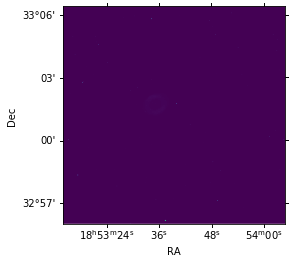

In [34]:
# head = pyfits.getheader('../calor_alto_data/NGC6720/dubU_0528.fits')
hdu = pyfits.getdata('../archival_data/iac80/Ring Nebula/2010-03-12/V/O100311_0246.fits')
w = WCS('../archival_data/iac80/Ring Nebula/2010-03-12/V/wcs.fits')

fig = plt.figure()
fig.add_subplot(111, projection=w)
plt.imshow(hdu, origin='lower', cmap=plt.cm.viridis)
plt.xlabel('RA')
plt.ylabel('Dec')

In [25]:
filename = get_pkg_data_filename('../archival_data/iac80/Ring Nebula/2010-03-12/V/O100311_0246.fits')

hdu = pyfits.open(filename)[0]

In [26]:
wcs = WCS(hdu.header)

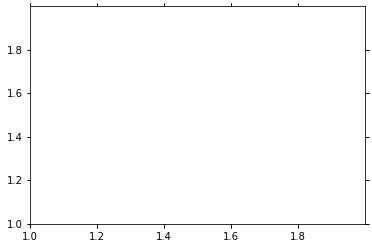

In [27]:
ax = plt.subplot(projection=wcs)

In [28]:
from astropy.visualization.wcsaxes import WCSAxes

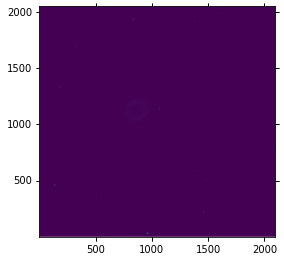

In [29]:
image_data = pyfits.getdata(filename)
fig = plt.figure()
ax = WCSAxes(fig, [0.1, 0.1, 0.8, 0.8], wcs=wcs)
fig.add_axes(ax)  # note that the axes have to be added to the figure
ax.imshow(image_data, origin='lower')

In [17]:
hdu.header['RA'] = '18:53:34'
hdu.header['DEC'] = '+33:01:35'

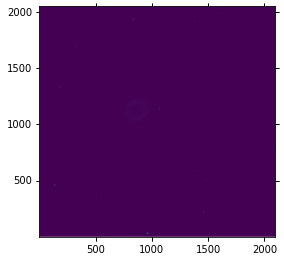

In [32]:
fig = plt.figure()
ax = WCSAxes(fig, [0.1, 0.1, 0.8, 0.8], wcs=wcs)
fig.add_axes(ax)  # note that the axes have to be explicitly added to the figure
image = pyfits.getdata('../archival_data/iac80/Ring Nebula/2010-03-12/V/O100311_0246.fits')
plt.imshow(image)

In [31]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS : 2098  2048